### Campaign Strategist | Home assignment
* One of REEF’s biggest revenue channels is our DSP activity. 
* At REEF DSP is defined as the demand side for our ghost kitchen business. 
* This includes platforms such as Doordash,  Ubereats, Delievroo, and more.
* REEF owns and manages thousands of “storefronts” of different food brands, within multiple DSPs and across multiple locations. * For example, REEF operates the Mr. Beast Burgers store, across 10 countries, 200 locations, and 600 storefronts. 
* This means  that one Mr. Beast location can sell throughout multiple DSP storefronts (Ubereats, Grubhub,  Doordash, Justeat, Talabat…) 
* As part of your role, you will plan and oversee the execution of both paid and organic growth experiments and evergreen campaigns. 

* Attached, you can find a dataset with the performance results of campaigns run on a single DSP platform for a period of 30 days. 
* The results are split into two tabs, for two types of campaigns: Sponsored Listings and Promotions.
    * Sponsored Listings= ad units on the delivery platform homefeed, and help increase your “storefront” visibility but placing it higher in the feed. As a marketer, you can set the daily budget guardrails, and the bid (manual or autobid). You are charged on a CPA basis, and your total Sponsored Listings spend is determined based on the volume of orders you get times the CPA. 
    * Promotions: special offers to the customer. The total Promotions ad spend is determined based on the # of promotions redeemed times the level of the discount given (so if I give 2 dollars OFF 20 dollars , and 500 orders redeemed this promotion, my ad spend will be 1000 dollars).
	
* Please analyze the data set provided, and create a document with 5-10 optimization recommendations that you believe can improve the results. Please back your recommendations by data. 

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
spons = pd.read_excel('REEF_Home-exercise .xls', sheet_name = 'SPONSORED_LISTING')
promo = pd.read_excel('REEF_Home-exercise .xls', sheet_name = 'REEF_Home-exercise ')

### Sponsored

In [4]:
spons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         16383 non-null  object 
 1   Campaign Name                16383 non-null  object 
 2   Campaign Start Date          16383 non-null  object 
 3   Campaign End Date            16383 non-null  object 
 4   Store ID                     16383 non-null  int64  
 5   Store Name                   16383 non-null  object 
 6   Impressions                  16383 non-null  int64  
 7   Clicks                       16383 non-null  int64  
 8   Orders                       16383 non-null  int64  
 9   Sales                        16383 non-null  float64
 10  Spend                        16383 non-null  float64
 11  New Customers Acquired       16383 non-null  int64  
 12  Existing Customers Acquired  16383 non-null  int64  
dtypes: float64(2), i

In [5]:
# Change the date column into datetime format, and extract the month, the day of the week, and the day for each observation: 
spons['Date'] =  pd.to_datetime(spons['Date'])
spons['month'] = pd.DatetimeIndex(spons['Date']).month 
spons['day'] = pd.DatetimeIndex(spons['Date']).dayofweek
spons['date']= spons['Date'].astype('datetime64[M]')

spons['Campaign Start Date'] =  pd.to_datetime(spons['Campaign Start Date'])
spons['Campaign End Date'] =  pd.to_datetime(spons['Campaign End Date'])
spons.head(2)

,Date,Campaign Name,Campaign Start Date,Campaign End Date,Store ID,Store Name,Impressions,Clicks,Orders,Sales,Spend,New Customers Acquired,Existing Customers Acquired,month,day,date
0,2022-09-13,Sponsored Listing,2022-07-02,2122-07-02,641054,Wings & Things (SEA02-1),297,5,1,17.98,5.66,1,0,9,1,2022-09-01
1,2022-09-14,Sponsored Listing,2022-07-02,2122-07-02,641054,Wings & Things (SEA02-1),395,21,4,91.92,17.03,2,2,9,2,2022-09-01


6119


<AxesSubplot:xlabel='Sales', ylabel='Count'>

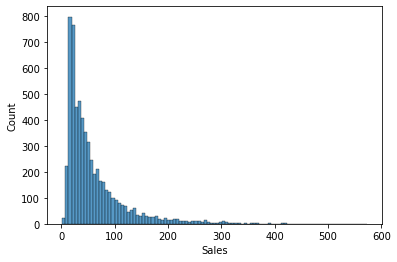

In [6]:
# Sales > 0 distribution:
sponsNot0 = spons.query('Sales != 0')
print(len(sponsNot0))
sns.histplot(data=sponsNot0['Sales'])

In [7]:
# number of observation with sales value of 0:
len(spons[spons['Sales']==0])

10264

In [8]:
# number of observation with sales value lower then 200:
len(spons[spons['Sales']<200])

16152

<AxesSubplot:xlabel='Orders', ylabel='Count'>

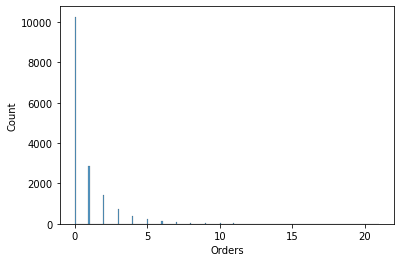

In [9]:
# orders distribution:
sns.histplot(data=spons['Orders'])

<AxesSubplot:xlabel='Clicks', ylabel='Count'>

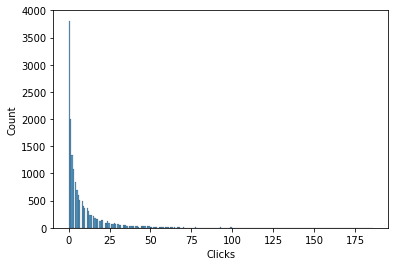

In [10]:
# click distribution:
sns.histplot(data=spons['Clicks'])

<AxesSubplot:xlabel='Impressions', ylabel='Count'>

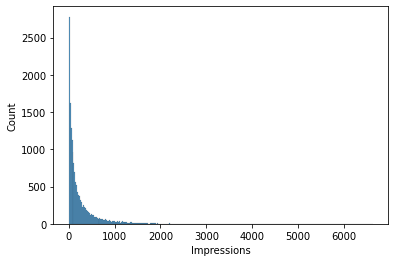

In [11]:
# impressions distribution:
sns.histplot(data=spons['Impressions'])

In [12]:
# number of observations with impression value lower then 1000:
len(spons[spons['Impressions']>1000])

887

In [13]:
# find the date range:
print(spons['Date'].min())
print(spons['Date'].max())

2022-01-10 00:00:00
2022-12-10 00:00:00


In [14]:
# calculate the campaign duration and distribution:
spons['CampaignDuration']=round((spons['Campaign End Date']-spons['Campaign Start Date'])/np.timedelta64(1, 'D'))
spons['CampaignDuration'].describe()

count    16383.000000
mean     36506.171824
std        806.614175
min          4.000000
25%      36524.000000
50%      36524.000000
75%      36524.000000
max      36524.000000
Name: CampaignDuration, dtype: float64

In [15]:
# number of campaign that suppose to last less then 100 years:
len(spons[spons['CampaignDuration']<36500])

8

In [16]:
# find the funnel(conversion) of observations that have sales value bigger then 0:
sponsNot0 = spons.query('Sales!=0')
sponsNot0[['Impressions',
           'Clicks',
           'Orders',
           'Sales',
           'Spend',
           'New Customers Acquired',
           'Existing Customers Acquired',
           'CampaignDuration']].median()

Impressions                      353.00
Clicks                            12.00
Orders                             2.00
Sales                             40.40
Spend                              8.52
New Customers Acquired             1.00
Existing Customers Acquired        1.00
CampaignDuration               36524.00
dtype: float64

<AxesSubplot:>

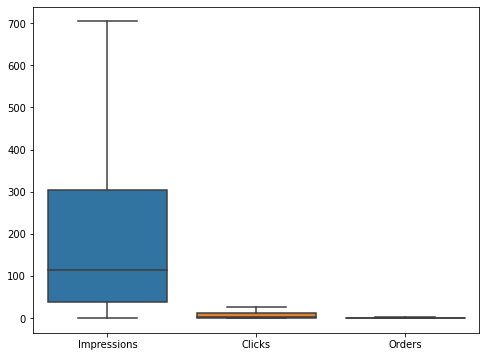

In [17]:
# plot box plot  with impressions- clicks- orders to see the distribution scale:
col = ['Impressions',
       'Clicks',
       'Orders',
       'Sales',
       'Spend',
       'New Customers Acquired',
       'Existing Customers Acquired',
       'CampaignDuration']

plt.figure(figsize=(8,6))
sns.boxplot(data=spons[['Impressions', 'Clicks', 'Orders']] ,showfliers = False)

In [18]:
spons['Campaign Name'].value_counts()

Sponsored Listing                16308
Sponsored Listing-Tipsy Scoop       75
Name: Campaign Name, dtype: int64

**Mor said I can assume thos two are the same**

In [19]:
grp_spons_month =  spons.groupby('month').agg({'Store ID':'nunique',
                                               'Impressions': 'sum',
                                               'Date' : 'nunique',
                                               'Clicks':'sum',
                                               'Orders':'sum',
                                               'Sales':'sum',
                                               'Spend':'sum',
                                               'New Customers Acquired':'sum',
                                               'Existing Customers Acquired':'sum'}).reset_index()

grp_spons_month

,month,Store ID,Impressions,Date,Clicks,Orders,Sales,Spend,New Customers Acquired,Existing Customers Acquired
0,1,350,123332,1,4203,407,11270.02,2348.05,239,167
1,2,351,128842,1,4321,371,10267.38,2164.40,222,149
2,3,344,109023,1,3578,346,8568.79,2044.15,198,148
3,4,346,82034,1,2865,244,5808.94,1424.13,136,108
4,5,342,74290,1,2510,241,6388.09,1444.13,124,117
5,6,343,65269,1,2342,197,5058.57,1143.65,95,101
6,7,354,83178,1,2970,325,8533.32,1930.18,163,162
7,8,351,96496,1,3293,322,8330.87,1913.00,162,159
8,9,414,2061389,19,68578,6627,166270.09,39059.54,3731,2880
9,10,369,1472327,14,46484,4807,125244.55,29736.38,2750,2047


In [20]:
grp_spons_month_name =  spons.groupby(['month', 'Store Name']).agg({'Impressions': 'sum',
                                                               'Date' : 'nunique',
                                                               'Clicks':'sum',
                                                               'Orders':'sum',
                                                               'Sales':'sum',
                                                               'Spend':'sum',
                                                               'New Customers Acquired':'sum',
                                                               'Existing Customers Acquired':'sum'}).reset_index()
grp_spons_month_name.sort_values(by ='Impressions', ascending= False).head(5)

,month,Store Name,Impressions,Date,Clicks,Orders,Sales,Spend,New Customers Acquired,Existing Customers Acquired
2971,9,Nathan's Famous (PHI04-2),84678,19,1351,59,1252.46,376.88,30,29
2930,9,MrBeast Burger (ATL43-1),70627,19,2053,96,2027.94,644.15,66,30
2954,9,MrBeast Burger (PHX01-1),66470,19,1978,235,4804.17,1440.03,127,104
3329,10,MrBeast Burger (ATL43-1),64084,14,1681,120,2545.35,810.11,85,35
2873,9,Man vs Fries (ATL43-2),45581,19,1762,186,5380.94,1102.48,94,92


In [21]:
# find the leads resturents in each month:
for m in range(13):
    g = grp_spons_month_name.loc[grp_spons_month_name['month']==m]
    g= g.sort_values(by ='Impressions', ascending= False)
    print(g.head(1))
    print("**********************************************")

Empty DataFrame
Columns: [month, Store Name, Impressions, Date, Clicks, Orders, Sales, Spend, New Customers Acquired, Existing Customers Acquired]
Index: []
**********************************************
     month                 Store Name  Impressions  Date  Clicks  Orders  \
159      1  Nathan's Famous (PHI04-2)         5831     1     110       4   

      Sales  Spend  New Customers Acquired  Existing Customers Acquired  
159  100.18  28.45                       3                            1  
**********************************************
     month                 Store Name  Impressions  Date  Clicks  Orders  \
509      2  Nathan's Famous (PHI04-2)         6625     1     150       3   

     Sales  Spend  New Customers Acquired  Existing Customers Acquired  
509  67.43  17.48                       1                            2  
**********************************************
     month                 Store Name  Impressions  Date  Clicks  Orders  \
857      3  Nathan's Famou

In [242]:
# normeliz September to see if the data on the same scale as the rest of the other month:
grp_spons_month.loc[8]/19


month                               0.473684
Store ID                           21.789474
Impressions                    108494.157895
Date                                1.000000
Clicks                           3609.368421
Orders                            348.789474
Sales                            8751.057368
Spend                            2055.765263
New Customers Acquired            196.368421
Existing Customers Acquired       151.578947
Name: 8, dtype: float64

In [243]:
# normeliz October to see if the data on the same scale as the rest of the other month:
grp_spons_month.loc[9]/14

month                               0.714286
Store ID                           26.357143
Impressions                    105166.214286
Date                                1.000000
Clicks                           3320.285714
Orders                            343.357143
Sales                            8946.039286
Spend                            2124.027143
New Customers Acquired            196.428571
Existing Customers Acquired       146.214286
Name: 9, dtype: float64

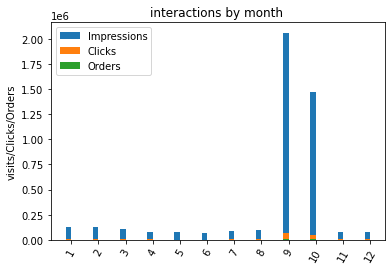

In [289]:
# distribution of impressions/clicks/orders by month:
x = np.arange(len(grp_spons_month['month']))
width = 0.2
fig, ax_month = plt.subplots()
rects1 = ax_month.bar(x - width/2, grp_spons_month['Impressions'], width,  label = 'Impressions')
rects1 = ax_month.bar(x - width/2, grp_spons_month['Clicks'], width,  label = 'Clicks')
rects1 = ax_month.bar(x - width/2, grp_spons_month['Orders'], width,  label = 'Orders')
ax_month.set_ylabel('visits/Clicks/Orders')
ax_month.set_xticks(x, grp_spons_month['month'].astype('string'), rotation =60)
ax_month.set_title('interactions by month ')
ax_month.legend()
plt.show()


In [245]:
# sponsered ad grouped by day of the week:
grp_spons_day =  spons.groupby('day').agg({'Store ID':'nunique',
                                           'Impressions': 'sum',
                                           'Clicks':'sum',
                                           'Orders':'sum',
                                           'Sales':'sum',
                                           'Spend':'sum',
                                           'New Customers Acquired':'sum',
                                           'Existing Customers Acquired':'sum'}).reset_index()

grp_spons_day

,day,Store ID,Impressions,Clicks,Orders,Sales,Spend,New Customers Acquired,Existing Customers Acquired
0,0,396,649410,22515,2175,56068.18,12914.28,1264,907
1,1,415,566963,15495,1818,45344.83,10947.33,988,827
2,2,405,479234,16087,1596,39584.37,9417.15,848,742
3,3,407,794026,26727,2657,67657.94,15651.97,1502,1152
4,4,395,646284,21123,2017,50959.51,12182.90,1122,887
5,5,395,656455,22024,2024,53282.80,12291.23,1169,854
6,6,394,666187,22855,2159,56501.49,13028.39,1219,935


In [246]:
# sponsered ad grouped by date:
grp_spons_date =  spons.groupby('Date').agg({'Store ID':'nunique',
                                           'Impressions': 'sum',
                                           'Clicks':'sum',
                                           'Orders':'sum',
                                           'Sales':'sum',
                                           'Spend':'sum',
                                           'New Customers Acquired':'sum',
                                           'Existing Customers Acquired':'sum'}).reset_index()
grp_spons_date['Clicks/Impressions'] = grp_spons_date['Clicks']/grp_spons_date['Impressions']
grp_spons_date['Orders/Clicks'] = grp_spons_date['Orders']/grp_spons_date['Clicks']
grp_spons_date['Orders/Impressions'] = grp_spons_date['Orders']/grp_spons_date['Impressions']

# sort the grouped fata by Orders/Impressions ratio in decending order: 
grp_spons_date.sort_values(by=['Orders/Impressions'], ascending=False)

,Date,Store ID,Impressions,Clicks,Orders,Sales,Spend,New Customers Acquired,Existing Customers Acquired,Clicks/Impressions,Orders/Clicks,Orders/Impressions
35,2022-10-20,343,83854,2912,335,8656.11,2083.63,182,153,0.034727,0.115041,0.003995
6,2022-07-10,354,83178,2970,325,8533.32,1930.18,163,162,0.035707,0.109428,0.003907
33,2022-10-18,344,79052,2882,297,7520.65,1778.48,152,144,0.036457,0.103053,0.003757
36,2022-10-21,345,99189,3241,372,9623.95,2305.88,210,161,0.032675,0.114779,0.003750
32,2022-10-17,345,92501,3363,346,8843.02,2089.70,198,145,0.036356,0.102884,0.003741
9,2022-09-13,386,101246,3442,376,9453.14,2234.33,204,172,0.033996,0.109239,0.003714
15,2022-09-19,372,103630,3537,382,9596.56,2278.95,222,160,0.034131,0.108001,0.003686
18,2022-09-22,372,103319,3382,365,9041.28,2161.28,199,165,0.032734,0.107924,0.003533
25,2022-09-29,357,96569,3260,341,8702.10,1948.37,192,149,0.033758,0.104601,0.003531
38,2022-10-23,350,128919,4366,455,11825.82,2913.62,273,179,0.033866,0.104214,0.003529


In [247]:
grp_spons_date

,Date,Store ID,Impressions,Clicks,Orders,Sales,Spend,New Customers Acquired,Existing Customers Acquired,Clicks/Impressions,Orders/Clicks,Orders/Impressions
0,2022-01-10,350,123332,4203,407,11270.02,2348.05,239,167,0.034079,0.096836,0.003300
1,2022-02-10,351,128842,4321,371,10267.38,2164.40,222,149,0.033537,0.085860,0.002879
2,2022-03-10,344,109023,3578,346,8568.79,2044.15,198,148,0.032819,0.096702,0.003174
3,2022-04-10,346,82034,2865,244,5808.94,1424.13,136,108,0.034925,0.085166,0.002974
4,2022-05-10,342,74290,2510,241,6388.09,1444.13,124,117,0.033787,0.096016,0.003244
5,2022-06-10,343,65269,2342,197,5058.57,1143.65,95,101,0.035882,0.084116,0.003018
6,2022-07-10,354,83178,2970,325,8533.32,1930.18,163,162,0.035707,0.109428,0.003907
7,2022-08-10,351,96496,3293,322,8330.87,1913.00,162,159,0.034126,0.097783,0.003337
8,2022-09-10,355,102204,3526,270,7193.26,1667.21,162,108,0.034500,0.076574,0.002642
9,2022-09-13,386,101246,3442,376,9453.14,2234.33,204,172,0.033996,0.109239,0.003714


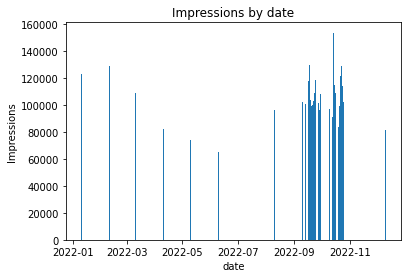

In [293]:
plt.bar(grp_spons_date['Date'], grp_spons_date['Impressions'])
plt.title('Impressions by date')
plt.xlabel('date')
plt.ylabel('Impressions')
plt.show()

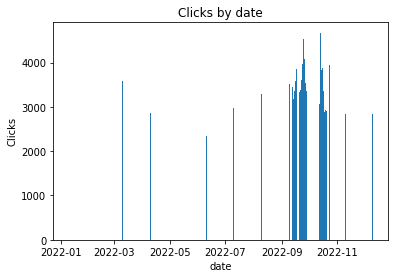

In [294]:
plt.bar(grp_spons_date['Date'], grp_spons_date['Clicks'])
plt.title('Clicks by date')
plt.xlabel('date')
plt.ylabel('Clicks')
plt.show()

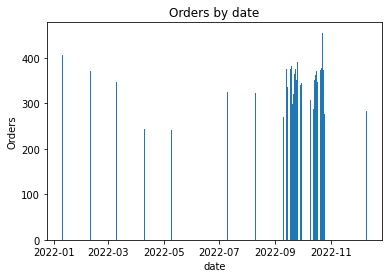

In [295]:
plt.bar(grp_spons_date['Date'], grp_spons_date['Orders'])
plt.title('Orders by date')
plt.xlabel('date')
plt.ylabel('Orders')
plt.show()

In [253]:
# group the sponsered data by store id:
grp_spons1 = spons.groupby('Store ID').agg({'Date':['min','max'],
                                                    'Impressions': 'sum',
                                                    'Clicks':'sum',
                                                    'Orders':'sum',
                                                    'Sales':'sum',
                                                    'Spend':'sum',
                                                    'New Customers Acquired':'sum',
                                                    'Existing Customers Acquired':'sum'}).reset_index()

grp_spons1.columns = ['Store ID','start_date', 'end_date', 
                      'spons_views', 'spons_clicks', 'spons_orders', 'spons_sales',
                      'spons_costs', 'spns New Customers Acquired','spons Existing Customers Acquired']


# calculate the period of time each store had been advertised[days]:
grp_spons1['ad_duration'] = round((grp_spons1['end_date']-grp_spons1['start_date'])/np.timedelta64(1, 'D'))

grp_spons1.head()

,Store ID,start_date,end_date,spons_views,spons_clicks,spons_orders,spons_sales,spons_costs,spns New Customers Acquired,spons Existing Customers Acquired,ad_duration
0,641054,2022-01-10,2022-12-10,16451,711,96,2395.61,443.86,65,30,334.0
1,674557,2022-01-10,2022-12-10,4796,169,16,314.12,48.00,6,10,334.0
2,676855,2022-01-10,2022-12-10,713,32,3,70.43,16.51,0,3,334.0
3,679961,2022-01-10,2022-12-10,32635,1026,128,3369.66,766.04,80,48,334.0
4,679963,2022-01-10,2022-12-10,12140,479,66,1902.31,405.24,49,17,334.0


In [256]:
# find the distribution od ad duration:
grp_spons1['ad_duration'].describe()

count    421.000000
mean     284.700713
std      112.822557
min        0.000000
25%      334.000000
50%      334.000000
75%      334.000000
max      334.000000
Name: ad_duration, dtype: float64

In [257]:
# check the stores with ad duration lower then 334:
grp_spons1[grp_spons1['ad_duration']<334]

,Store ID,start_date,end_date,spons_views,spons_clicks,spons_orders,spons_sales,spons_costs,spns New Customers Acquired,spons Existing Customers Acquired,ad_duration
5,702703,2022-09-13,2022-09-30,4994,127,11,218.97,68.20,4,7,17.0
6,713837,2022-02-10,2022-09-17,2406,64,6,152.36,36.02,4,2,219.0
7,736589,2022-09-13,2022-09-15,201,0,0,0.00,0.00,0,0,2.0
13,762102,2022-01-10,2022-11-10,1346,41,6,127.89,35.72,4,2,304.0
14,762109,2022-09-13,2022-09-15,83,3,1,25.90,3.00,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
414,2457617,2022-09-13,2022-09-26,1708,39,2,51.42,15.64,2,0,13.0
415,2457623,2022-09-13,2022-10-25,662,14,1,16.73,6.05,1,0,42.0
417,2457646,2022-09-13,2022-09-27,33,0,0,0.00,0.00,0,0,14.0
418,2457705,2022-09-13,2022-09-30,747,17,0,0.00,0.00,0,0,17.0


In [254]:
# find the stores that have sales value of zero:
grp_spons1_0 =  grp_spons1.loc[grp_spons1['spons_sales']==0]

# find the stores that have sales value bigger then zero:
grp_spons1_not0 = grp_spons1.loc[grp_spons1['spons_sales']!=0]

# calculate the ratio costs/sales for each store:
grp_spons1_not0['spons costs/sales'] = grp_spons1_not0['spons_costs']/grp_spons1_not0['spons_sales']
grp_spons1_not0.sort_values(by=['spons costs/sales'], ascending=False)

C:\Users\evyatar\AppData\Local\Temp/ipykernel_13260/2012760833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp_spons1_not0['spons costs/sales'] = grp_spons1_not0['spons_costs']/grp_spons1_not0['spons_sales']


,Store ID,start_date,end_date,spons_views,spons_clicks,spons_orders,spons_sales,spons_costs,spns New Customers Acquired,spons Existing Customers Acquired,ad_duration,spons costs/sales
339,2243745,2022-01-10,2022-12-10,712,10,1,8.59,7.32,1,0,334.0,0.852154
317,1873710,2022-01-10,2022-12-10,1398,22,1,13.45,7.97,1,0,334.0,0.592565
32,955360,2022-01-10,2022-12-10,506,11,2,24.90,14.75,1,1,334.0,0.592369
324,1906477,2022-01-10,2022-12-10,15494,186,34,323.24,171.71,10,23,334.0,0.531215
245,1742613,2022-01-10,2022-12-10,3517,73,4,57.95,27.73,2,2,334.0,0.478516
...,...,...,...,...,...,...,...,...,...,...,...,...
302,1842346,2022-01-10,2022-12-10,5373,327,13,834.28,80.59,7,6,334.0,0.096598
88,1385568,2022-01-10,2022-12-10,2212,59,13,432.15,39.00,5,8,334.0,0.090246
353,2389014,2022-01-10,2022-12-10,979,16,1,39.89,3.51,1,0,334.0,0.087992
75,1292206,2022-01-10,2022-12-10,1292,63,5,351.03,28.82,2,3,334.0,0.082101


In [255]:
grp_spons1_0.head(3)

,Store ID,start_date,end_date,spons_views,spons_clicks,spons_orders,spons_sales,spons_costs,spns New Customers Acquired,spons Existing Customers Acquired,ad_duration
7,736589,2022-09-13,2022-09-15,201,0,0,0.0,0.0,0,0,2.0
19,803366,2022-09-13,2022-09-15,392,3,0,0.0,0.0,0,0,2.0
30,915091,2022-09-13,2022-09-15,89,3,0,0.0,0.0,0,0,2.0


### Promotions:

In [258]:
promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2828 entries, 0 to 2827
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2828 non-null   object 
 1   Campaign Name                2828 non-null   object 
 2   Type of Promotion            2828 non-null   object 
 3   Campaign Start Date          2828 non-null   object 
 4   Campaign End Date            2828 non-null   object 
 5   Store ID                     2828 non-null   int64  
 6   Store Name                   2828 non-null   object 
 7   Orders                       2828 non-null   int64  
 8   Sales                        2828 non-null   float64
 9   Promo Cost                   2828 non-null   float64
 10  New Customers Acquired       2828 non-null   int64  
 11  Existing Customers Acquired  2828 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 265.2+ KB


In [259]:
# Change the date column into datetime format, and extract the month, the day of the week, and the day for each observation: 
promo['Date'] =  pd.to_datetime(promo['Date'])
promo['month'] = pd.DatetimeIndex(promo['Date']).month 
promo['day'] = pd.DatetimeIndex(promo['Date']).dayofweek
promo['date']= promo['Date'].astype('datetime64[M]')

promo['Campaign Start Date'] =  pd.to_datetime(promo['Campaign Start Date'])
promo['Campaign End Date'] =  pd.to_datetime(promo['Campaign End Date'])
promo.sample(10)

,Date,Campaign Name,Type of Promotion,Campaign Start Date,Campaign End Date,Store ID,Store Name,Orders,Sales,Promo Cost,New Customers Acquired,Existing Customers Acquired,month,day,date
1659,2022-09-16,"Dormant Customers, 20% Off",Discount for lapsed customers,2021-09-11,2121-09-11,2301227,Milk Bar (ATL65-1),1,18.68,4.73,0,1,9,4,2022-09-01
2241,2022-09-25,coke-5off15-090822-110722-dp,Custom campaign,2022-08-09,2022-08-11,2624370,Wendy's (AUS23-3),1,16.36,3.43,1,0,9,6,2022-09-01
1484,2022-09-20,"First Order, $5 Off",Discount for new customers,2021-07-11,2121-07-11,1906407,Neighborhood Scoops (sATL59-1),2,40.84,11.98,2,0,9,1,2022-09-01
1939,2022-10-23,coke-5off15-090822-110722-dp,Custom campaign,2022-08-09,2022-08-11,2530530,Wendy's (POR57-1),2,32.51,6.86,2,0,10,6,2022-10-01
1368,2022-10-17,"First Order, $8 Off",Discount for new customers,2021-09-11,2121-09-11,1842346,Milk Bar (MIA09-1),2,181.50,17.98,2,0,10,0,2022-10-01
2200,2022-10-23,Spend $20 Get $3 Off,Discount for all customers,2022-10-21,2023-01-31,2617295,Wendy's (LAX62-1),3,62.49,11.97,2,1,10,6,2022-10-01
2303,2022-01-10,coke-5off15-090822-110722-dp,Custom campaign,2022-08-09,2022-08-11,2671702,Wendy's (AUS04-3),2,56.05,6.86,0,2,1,0,2022-01-01
2757,2022-10-19,Spend $25 Get $5 Off,Discount for all customers,2022-09-28,2122-09-28,23370747,Doughp (MIA08-1),1,33.34,5.99,1,0,10,2,2022-10-01
2276,2022-10-24,Spend $20 Get $3 Off,Discount for all customers,2022-10-21,2023-01-31,2628371,Wow Bao (MIN30-1),17,496.63,67.83,6,11,10,0,2022-10-01
639,2022-10-24,Spend $20 Get $3 Off,Discount for all customers,2022-10-21,2023-01-31,1562803,MrBeast Burger (DEN02-1),4,172.62,15.96,4,0,10,0,2022-10-01


In [260]:
#check for null values:
promo.isnull().sum()

Date                           0
Campaign Name                  0
Type of Promotion              0
Campaign Start Date            0
Campaign End Date              0
Store ID                       0
Store Name                     0
Orders                         0
Sales                          0
Promo Cost                     0
New Customers Acquired         0
Existing Customers Acquired    0
month                          0
day                            0
date                           0
dtype: int64

In [261]:
#check for duplicates:
promo.duplicated().sum()

0

In [22]:
# find the the different values count for columns- ['Campaign Name', 'Type of Promotion', 'Store Name']:
rel_columns = ['Campaign Name', 'Type of Promotion', 'Store Name']
for column in rel_columns:
    print('********************', column, '********************')
    print(promo[column].value_counts())
    print()

******************** Campaign Name ********************
Spend $20 Get $3 Off                                     1113
First Order, $5 Off                                       397
First Order, $8 Off                                       200
Spend $X Get $Y                                           189
Spend $20 Get 20% Off                                     172
Spend $20 Get $5 Off                                      119
coke-5off15-090822-110722-dp                              105
Spend $20 Get $4 Off                                       99
Dormant Customers, 20% Off                                 89
First Order, $3 Off                                        89
Spend $15 Get 20% Off                                      45
Spend $25 Get 20% Off                                      42
Spend $25 Get $5 Off                                       29
unilever-4off15-091522-093022-allcx                        27
First Order, $4 Off                                        24
DP MAU Sept Go

In [263]:
# group the promotion table by date:
grp_promo_date = promo.groupby('Date').agg({'Campaign Name':'nunique',
                                        'Store ID':'nunique',
                                        'Orders': 'sum',
                                        'Sales':'sum',
                                        'Promo Cost':'sum',
                                        'New Customers Acquired':'sum',
                                        'Existing Customers Acquired':'sum'}).reset_index()
grp_promo_date

,Date,Campaign Name,Store ID,Orders,Sales,Promo Cost,New Customers Acquired,Existing Customers Acquired
0,2022-01-10,16,48,105,3674.78,609.20,74,30
1,2022-02-10,15,38,117,3694.56,636.48,67,49
2,2022-03-10,12,33,92,2978.68,550.50,56,35
3,2022-04-10,10,28,93,2869.57,557.00,53,39
4,2022-05-10,14,39,87,2631.12,517.25,54,33
5,2022-06-10,15,43,103,3241.11,607.30,53,50
6,2022-07-10,13,38,96,2852.54,552.97,42,53
7,2022-08-10,13,35,100,3206.55,555.29,60,40
8,2022-09-10,14,50,119,3629.17,665.52,76,43
9,2022-09-13,13,43,102,3683.93,636.03,61,41


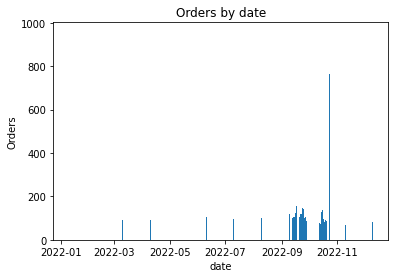

In [296]:

plt.bar(grp_promo_date['Date'], grp_promo_date['Orders'])
plt.title('Orders by date')
plt.xlabel('date')
plt.ylabel('Orders')
plt.show()

In [265]:
# group the promotion table by month:
grp_promo_month = promo.groupby('month').agg({'Campaign Name':'nunique',
                                        'Store ID':'nunique',
                                        'Orders': 'sum',
                                        'Sales':'sum',
                                        'Promo Cost':'sum',
                                        'New Customers Acquired':'sum',
                                        'Existing Customers Acquired':'sum'}).reset_index()
# find the ratio Promo Cost/sales:
grp_promo_month['Promo Cost/sales']=grp_promo_month['Promo Cost']/grp_promo_month['Sales']
grp_promo_month

,month,Campaign Name,Store ID,Orders,Sales,Promo Cost,New Customers Acquired,Existing Customers Acquired,Promo Cost/sales
0,1,16,48,105,3674.78,609.20,74,30,0.165779
1,2,15,38,117,3694.56,636.48,67,49,0.172275
2,3,12,33,92,2978.68,550.50,56,35,0.184813
3,4,10,28,93,2869.57,557.00,53,39,0.194106
4,5,14,39,87,2631.12,517.25,54,33,0.196589
5,6,15,43,103,3241.11,607.30,53,50,0.187374
6,7,13,38,96,2852.54,552.97,42,53,0.193852
7,8,13,35,100,3206.55,555.29,60,40,0.173174
8,9,23,203,2266,73836.24,13158.27,1368,887,0.178209
9,10,19,471,4059,128611.52,18468.30,2495,1543,0.143598


In [266]:
# September October values for the promotion table: 
grp_promo_month[8:10]

,month,Campaign Name,Store ID,Orders,Sales,Promo Cost,New Customers Acquired,Existing Customers Acquired,Promo Cost/sales
8,9,23,203,2266,73836.24,13158.27,1368,887,0.178209
9,10,19,471,4059,128611.52,18468.30,2495,1543,0.143598


In [267]:
##September October values for the sponsered table: 
grp_spons_month['Spend/sales']=grp_spons_month['Spend']/grp_spons_month['Sales']
grp_spons_month[8:10]

,month,Store ID,Impressions,Date,Clicks,Orders,Sales,Spend,New Customers Acquired,Existing Customers Acquired,Spend/sales
8,9,414,2061389,19,68578,6627,166270.09,39059.54,3731,2880,0.234916
9,10,369,1472327,14,46484,4807,125244.55,29736.38,2750,2047,0.237427


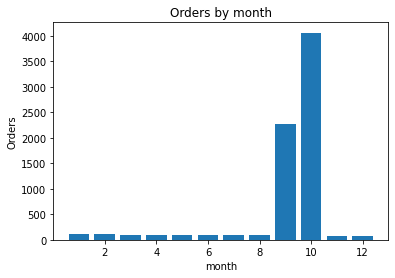

In [297]:
plt.bar(grp_promo_month['month'], grp_promo_month['Orders'])
plt.title('Orders by month')
plt.xlabel('month')
plt.ylabel('Orders')
plt.show()

In [269]:
# grouped the promotion table by the od the week:
grp_promo_dow = promo.groupby('day').agg({'Campaign Name':'nunique',
                                        'Store ID':'nunique',
                                        'Orders': 'sum',
                                        'Sales':'sum',
                                        'Promo Cost':'sum',
                                        'New Customers Acquired':'sum',
                                        'Existing Customers Acquired':'sum'}).reset_index()
grp_promo_dow

,day,Campaign Name,Store ID,Orders,Sales,Promo Cost,New Customers Acquired,Existing Customers Acquired
0,0,24,357,1276,39801.37,6200.99,794,473
1,1,20,104,482,15454.15,2871.23,293,188
2,2,20,101,486,15568.78,2810.31,287,197
3,3,21,136,789,25338.80,4554.37,463,320
4,4,20,323,1146,37885.39,5793.21,674,466
5,5,20,358,1501,48384.30,7279.54,911,584
6,6,21,380,1586,49761.34,7589.62,998,581


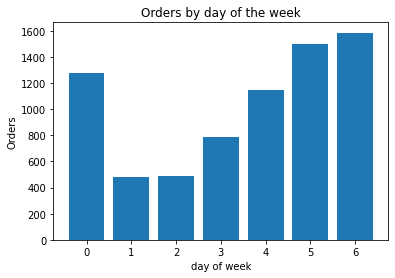

In [298]:
plt.bar(grp_promo_dow['day'], grp_promo_dow['Orders'])
plt.title('Orders by day of the week')
plt.xlabel('day of week')
plt.ylabel('Orders')
plt.show()

In [271]:
# groupe the promotion data by type of promotion and campaign name:
grp_promo = promo.groupby(['Type of Promotion','Campaign Name']).agg({'Store ID':'nunique',
                                                                      'Orders': 'sum',
                                                                      'Sales':'sum',
                                                                      'Promo Cost':'sum',
                                                                      'New Customers Acquired':'sum',
                                                                      'Existing Customers Acquired':'sum'}).reset_index()
grp_promo.columns = ['type_of_promotion', 
                    'campaign_name', 
                    'num_of_stores', 
                    'num_of_orders', 
                    'sales',
                    'promo_cost',
                    'new_customers_acquired',
                    'existing_customers_acquired']

grp_promo['costs/sales']= grp_promo['promo_cost']/grp_promo['sales'] 
grp_promo.sort_values(by=['costs/sales'], ascending=False)

,type_of_promotion,campaign_name,num_of_stores,num_of_orders,sales,promo_cost,new_customers_acquired,existing_customers_acquired,costs/sales
17,Discount for lapsed customers,"Dormant Customers, 25% Off",2,15,399.42,95.55,0,15,0.239222
4,Custom campaign,unilever-4off15-091522-093022-allcx,7,36,763.50,180.00,28,7,0.235756
20,Discount for new customers,"First Order, $5 Off",57,484,12464.90,2899.16,481,3,0.232586
16,Discount for lapsed customers,"Dormant Customers, 20% Off",36,91,2213.56,499.77,0,91,0.225777
5,Discount for all customers,Spend $15 Get 20% Off,2,80,1951.26,399.25,50,30,0.204611
15,Discount for all customers,Spend $X Get $Y,26,230,7254.76,1426.70,160,70,0.196657
11,Discount for all customers,Spend $25 Get 20% Off,1,327,13218.56,2439.17,229,98,0.184526
18,Discount for new customers,"First Order, $3 Off",11,107,2317.87,426.93,107,0,0.184191
19,Discount for new customers,"First Order, $4 Off",11,24,652.87,119.76,24,0,0.183436
9,Discount for all customers,Spend $20 Get 20% Off,5,1891,60560.40,10858.23,802,1078,0.179296


In [272]:
grp_promo

,type_of_promotion,campaign_name,num_of_stores,num_of_orders,sales,promo_cost,new_customers_acquired,existing_customers_acquired,costs/sales
0,Custom campaign,DP MAU Sept Go Big - Low Frequency Savers [Pro...,22,22,543.75,0.00,16,6,0.000000
1,Custom campaign,coke-3off15-090822-110722-allcx,8,15,349.36,45.00,9,6,0.128807
2,Custom campaign,coke-5off15-090822-110722-dp,21,172,3784.30,589.96,69,103,0.155897
3,Custom campaign,unilever-3off15-101722-101822-nondp,1,1,15.48,2.50,1,0,0.161499
4,Custom campaign,unilever-4off15-091522-093022-allcx,7,36,763.50,180.00,28,7,0.235756
5,Discount for all customers,Spend $15 Get 20% Off,2,80,1951.26,399.25,50,30,0.204611
6,Discount for all customers,Spend $20 Get $3 Off,344,3030,95874.77,12089.70,1882,1127,0.126099
7,Discount for all customers,Spend $20 Get $4 Off,9,280,7901.81,1397.20,168,110,0.176820
8,Discount for all customers,Spend $20 Get $5 Off,33,126,4221.42,754.74,83,43,0.178788
9,Discount for all customers,Spend $20 Get 20% Off,5,1891,60560.40,10858.23,802,1078,0.179296


In [274]:
# group the promotion table by store id and store name:
grp_promo_stor_id = promo.groupby(['Store ID', 'Store Name']).agg({'Campaign Name':'nunique',
                                                                   'Orders': 'sum',
                                                                   'Sales':'sum',
                                                                   'Promo Cost':'sum',
                                                                   'New Customers Acquired':'sum',
                                                                   'Existing Customers Acquired':'sum'}).reset_index()

grp_promo_stor_id.columns = ['Store ID', 'Store Name','number of Campaigns',
                             'promo Orders','promo Sales', 'Promo Cost',
                             'promo New Customers Acquired', 'promo Existing Customers Acquired']
grp_promo_stor_id.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Store ID                           571 non-null    int64  
 1   Store Name                         571 non-null    object 
 2   number of Campaigns                571 non-null    int64  
 3   promo Orders                       571 non-null    int64  
 4   promo Sales                        571 non-null    float64
 5   Promo Cost                         571 non-null    float64
 6   promo New Customers Acquired       571 non-null    int64  
 7   promo Existing Customers Acquired  571 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 35.8+ KB


In [304]:
# merge the grouped sponserd by store is and the grouped promotion by store id, to check what is more effective:
store_activity = grp_spons1.merge(grp_promo_stor_id, on='Store ID', how ='inner')
store_activity.drop(['start_date','end_date'], axis = 1)

,Store ID,spons_views,spons_clicks,spons_orders,spons_sales,spons_costs,spns New Customers Acquired,spons Existing Customers Acquired,ad_duration,Store Name,number of Campaigns,promo Orders,promo Sales,Promo Cost,promo New Customers Acquired,promo Existing Customers Acquired
0,641054,16451,711,96,2395.61,443.86,65,30,334.0,Wings & Things (SEA02-1),1,15,503.11,59.85,11,4
1,674557,4796,169,16,314.12,48.00,6,10,334.0,Wings & Things (MIA03-2),1,6,236.83,23.94,6,0
2,676855,713,32,3,70.43,16.51,0,3,334.0,Wings & Things (MIA10-2),1,3,76.45,11.97,1,2
3,679961,32635,1026,128,3369.66,766.04,80,48,334.0,Wings & Things (PHX01-1),1,5,135.39,28.95,4,1
4,679963,12140,479,66,1902.31,405.24,49,17,334.0,Wings & Things (POR05-1),1,11,412.69,43.89,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2456172,75640,2136,337,8207.88,1939.60,198,138,334.0,Capriotti's Sandwich Shop (MIN30-1),1,47,1601.83,187.53,30,17
263,2457554,3861,12,0,0.00,0.00,0,0,334.0,GoodPop Shop (AUS10-1),1,1,41.94,5.99,1,0
264,2457626,3797,112,16,365.44,91.66,9,7,334.0,In a Bun (AUS18-2),1,2,52.94,7.98,2,0
265,2457705,747,17,0,0.00,0.00,0,0,17.0,Tipsy Scoop (HOU22-1),1,1,42.00,7.99,1,0


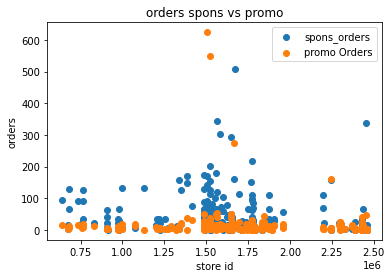

In [310]:
plt.scatter(store_activity['Store ID'],store_activity['spons_orders'], label = 'spons_orders')
plt.scatter(store_activity['Store ID'],store_activity['promo Orders'], label = 'promo Orders')
plt.title('orders spons vs promo')
plt.xlabel('store id')
plt.ylabel('orders')
plt.legend()
plt.show()

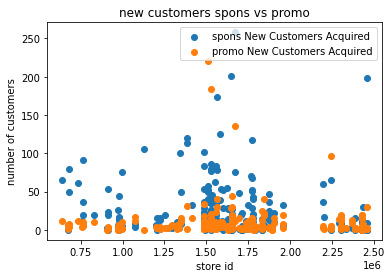

In [311]:
plt.scatter(store_activity['Store ID'],store_activity['spns New Customers Acquired'], label = 'spons New Customers Acquired')
plt.scatter(store_activity['Store ID'],store_activity['promo New Customers Acquired'], label = 'promo New Customers Acquired')
plt.title('new customers spons vs promo')
plt.xlabel('store id')
plt.ylabel('number of customers')
plt.legend()
plt.show()

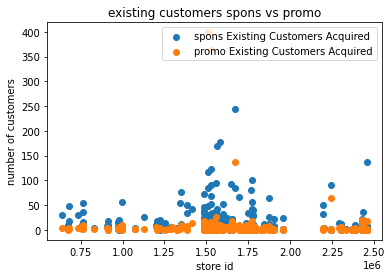

In [312]:
plt.scatter(store_activity['Store ID'],store_activity['spons Existing Customers Acquired'], label = 'spons Existing Customers Acquired')
plt.scatter(store_activity['Store ID'],store_activity['promo Existing Customers Acquired'], label = 'promo Existing Customers Acquired')
plt.title('existing customers spons vs promo')
plt.xlabel('store id')
plt.ylabel('number of customers')
plt.legend()
plt.show()

In [285]:
# list os stores with promotions outcome better the sponsere outcome:
id1=store_activity[store_activity['promo Orders']>store_activity['spons_orders']]['Store Name']
len(id1)
id1.values

array(['Sticky Wings (MIA10-2)', 'Sticky Wings (AUS05-2)',
       'Neighborhood Scoops (MIA09-1)', 'Neighborhood Scoops (MIA03-1)',
       'Krispy Rice (LAX27-2)', 'Man vs Fries (POR22-1)',
       'The Ice Cream Shop (MIA09-1)', 'MrBeast Burger (POR01-2)',
       "Rori's Artisanal Creamery (LAX21-1)", 'Man vs Fries (SEA12-2)',
       'Man vs Fries (SEA07-1)', 'Man vs Fries (BAL09-1)',
       'Man vs Fries (POR06-2)', 'Umami Burger (POR05-1)',
       'Umami Burger (AUS05-2)', "Sam's Crispy Chicken (AUS05-2)",
       'Neighborhood Scoops (LAX30-1)',
       "Rori's Artisanal Creamery (LAX04-1)", 'Aubi & Ramsa (MIA03-1)',
       'Aubi & Ramsa (MIA09-1)', "Rori's Artisanal Creamery (LAX30-1)",
       'Neighborhood Scoops (NSH02-1)', 'Neighborhood Scoops (AUS18-1)',
       'The Snacky Bear (MIN30-1)', 'Neighborhood Scoops (PHI05-1)',
       'Man vs Fries (POR25-1)', 'Umami Burger (POR01-2)',
       'Sticky Wings (PHI08-1)', 'Rebel Wings (BAL09-1)',
       'Man vs Fries (DET10-1)', 'Neighborh

# conclusion:

**Sponsored Listings**
1.	Of 16,383 observations, 10,264 leads to 0 sales, and 6119 leads to sales. outliers: sales above 200, orders above 5, clicks above 33, and impressions above 1000. The Data on the Sponsored ads start on 10/01/2022 and ends on 10/12/2022, Most of the campaigns on the Sponsored dataset are set to run out in 2122. The leading 'day of the week' by sales in the sponsored table is Thursday, and in the promotion table is Sunday.

2.	By looking at the data on median observations that have reached sales, there are 353 impressions, 12 clicks (3.3%), 2 orders (16%), and 1 new and 1 existing customer acquired per observation. Sales median value of 40, and 'spend' median value of 8.52(21.3%). September leads with observations on 19 different days, and October right after with 14 days. September has 2,061,389 impressions, 68,578 clicks(3.33%), 6,627 orders(9.66%), 2880 existing, and 3731 new customers acquired. sales value of 166,270 and 'spend 'value of 39,059 (23.5%).


3.	October has 1,472,327 impressions, 46,484 clicks(3.16%), and 4,807 orders (10.3%), 2047 existing and 2750 new customers acquired. Sales value of 125,244 and sponsored 'spend' value of 29,736(23.7%). September and October have the highest number of impressions even when we normalize it by the number of days (19 and 14). October 20th has the highest orders/clicks ratio 11.5%, and the highest orders/impression ratio 0.39%. October 18th has the highest click/impression ratio 3.6%. June is the month with the least impressions, clicks, and orders.

4.	The conversion rate (Clicks/Impressions) stays around 3%, I think it is possible to increase it by adjusting the ads to the customer preferences, maybe take an example from Nathan's Famous (PHI04-2) and MrBeast Burger (ATL43-1) which are the lead restaurants by impressions. we should check the ad on these two restaurants, how come those two restaurants have such a good result?


5.	The restaurants in the list below have 0 sales, something doesn't work with the ad on those restaurants, I think it's important to try and find out why the sales value is zero
['AUS Wings (AUS06-1)', 'Sticky Wings (AUS05-2)',
'Rebel Wings (LAX21-2)', 'Man vs Fries (AUS08-1)',
'AUS Wings (AUS08-1)', 'The Ice Cream Shop (BAL08-1)',
'MrBeast Burger (AUS06-1)', 'MrBeast Burger (PHI02-1)',
'MrBeast Burger (LAX02-1)', 'Man vs Fries (POR06-2)',
'Man vs Fries (HOU15-1)', "Sergio's Cuban Cafe & Grill (MIA28-2)",
'Aubi & Ramsa (MIA03-1)', 'Aubi & Ramsa (MIA09-1)',
"Rori's Artisanal Creamery (LAX30-1)",
'Goodees Cravings (ATL45-1)', 'The Snacky Bear (MIN30-1)',
'Man vs Fries (AUS06-1)', 'Nunbelievable (NSH02-1)',
'Wow Bao¬† (AUS08-1)', 'Sticky Wings (PHI13-1)',
'Sticky Wings (PHI08-1)', 'Wow Bao¬† (BAL09-1)',
'Neighborhood Scoops (TOR18-1)', 'Nunbelievable (MIA44-1)',
'Burn Burger (BAL17-2)', 'Rebel Wings (PHX09-1)',
'Sticky Wings (MIA37-2)', 'Rebel Wings (DEN02-1)',
'Lightning Burger (DAL04-1)', 'Aubi & Ramsa (MIA44-1)',
'Pamela Wasabi (MIA03-1)', 'Pamela Wasabi (MIA09-1)',
'Milk Bar (LAX30-1)', 'Milk Bar (MIA44-1)',
'Tipsy Scoop (MIA74-1)', 'The Ice Cream Shop (NSH10-1)',
'Wow Bao¬† (DAL54-1)', 'Sticky Wings (POR22-1)',
'Another Wing by DJ Khaled (PHI08-1)',
'Another Wing by DJ Khaled (AUS06-1)',
'Another Wing by DJ Khaled (BOS07-1)', 
'The Other Side (POR05-1)',
'The Other Side (POR01-2)', 
'Another Wing by DJ Khaled (AUS08-1)',
'Hims & Hers Health and Wellness (MIA74-1)',
'Hims & Hers Health and Wellness (MIA09-1)',
'Hims & Hers Health and Wellness (LAX03-1)',
'Hims & Hers Health and Wellness (AUS10-1)',
'Hims & Hers Health and Wellness (ATL65-1)',
'Hims & Hers Health and Wellness (PHI05-1)',
'Hims & Hers Health and Wellness (LAX30-1)',
'Hims & Hers Health and Wellness (ATL59-1)',
'Hims & Hers Health and Wellness (AUS07-1)',
'Hims & Hers Health and Wellness (HOU22-1)',
'Hims & Hers Health and Wellness (AUS18-1)',
'Hims & Hers Health and Wellness (LAX04-1)',
'Hims & Hers Health and Wellness (MIA44-1)',
'Hims & Hers Health and Wellness (ATL41-1)',
'Hims & Hers Health and Wellness (MIA108-1)',
'Hims & Hers Health and Wellness (MIA03-1)',
'GoodPop Shop (AUS07-1)', 'GoodPop Shop (AUS10-1)',
'The Other Side (AUS05-2)', 'Tipsy Scoop (HOU22-1)',
'Tipsy Scoop (AUS18-1)']


**Promotions**
1.	September is the most advertised month, by promotion and by sponsored ad, and it clearly works. The revenues increased, and new/Existing customers were acquired. It is possible that September advertisements effecting October as well. I think it is worth the shot to try and copy the September model strategy for the rest of the year.

2.	When we examine the promotion database- October has better results, it has more sales, more orders, and more customers acquired, but the Promo Cost/sales ratio is lower.

3.	The sponsored ads bring better results than the promotion except For the stores in the list below, we need to consider doing more promotions than sponsored ads for the stores in the list

 (['Sticky Wings (MIA10-2)', 'Sticky Wings (AUS05-2)',
'Neighborhood Scoops (MIA09-1)', 'Neighborhood Scoops (MIA03-1)',
'Krispy Rice (LAX27-2)', 'Man vs Fries (POR22-1)',
'The Ice Cream Shop (MIA09-1)', 'MrBeast Burger (POR01-2)',
"Rori's Artisanal Creamery (LAX21-1)", 'Man vs Fries (SEA12-2)',
'Man vs Fries (SEA07-1)', 'Man vs Fries (BAL09-1)',
'Man vs Fries (POR06-2)', 'Umami Burger (POR05-1)',
'Umami Burger (AUS05-2)', "Sam's Crispy Chicken (AUS05-2)",
'Neighborhood Scoops (LAX30-1)',
"Rori's Artisanal Creamery (LAX04-1)", 'Aubi & Ramsa (MIA03-1)',
'Aubi & Ramsa (MIA09-1)', "Rori's Artisanal Creamery (LAX30-1)",
'Neighborhood Scoops (NSH02-1)', 'Neighborhood Scoops (AUS18-1)',
'The Snacky Bear (MIN30-1)', 'Neighborhood Scoops (PHI05-1)',
'Man vs Fries (POR25-1)', 'Umami Burger (POR01-2)',
'Sticky Wings (PHI08-1)', 'Rebel Wings (BAL09-1)',
'Man vs Fries (DET10-1)', 'Neighborhood Scoops (MIA44-1)',
'Wings & Things (BAL17-1)', 'Rebel Wings (DEN02-1)',
'AUS Wings (AUS18-2)', 'Aubi & Ramsa (MIA44-1)',
'Aubi & Ramsa (MIA74-1)', 'Milk Bar (AUS10-1)',
'Milk Bar (AUS07-1)', 'Milk Bar (LAX30-1)', 'Milk Bar (MIA44-1)',
'Milk Bar (MIA03-1)', 'Milk Bar (MIA09-1)', 'Milk Bar (AUS18-1)',
'Milk Bar (PHI05-1)', 'Milk Bar (HOU22-1)', 'Popeyes (MIA37-3)',
'Tipsy Scoop (MIA74-1)', 'The Ice Cream Shop (AUS10-1)',
'The Ice Cream Shop (AUS18-1)', '7-Eleven by REEF (ATL41-1)',
'Milk Bar (ATL41-1)', 'Neighborhood Scoops (ATL41-1)',
'Dolcezza Gelato (BAL04-1)', 'Milk Bar (NSH02-1)',
'Milk Bar (NSH10-1)', 'Wings & Things (POR22-1)',
'Sticky Wings (POR22-1)', 'Another Wing by DJ Khaled (SEA12-1)',
'Another Wing by DJ Khaled (LAX21-2)',
'Another Wing by DJ Khaled (SEA03-1)',
'Another Wing by DJ Khaled (PHI08-1)',
'Another Wing by DJ Khaled (BAL09-1)',
'Another Wing by DJ Khaled (MIA37-2)',
'Another Wing by DJ Khaled (NSH10-1)', 'The Other Side (POR05-1)',
'GoodPop Shop (AUS10-1)', 'Tipsy Scoop (HOU22-1)',
'Tipsy Scoop (AUS18-1)' ]

